In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt
# from statsmodels.stats.weightstats import DescrStatsW
from scipy import linalg

In [2]:
98000001//1e6

98.0

In [3]:
arr=[3,7,5,9,4,2,8,9]
arr[::1]

[3, 7, 5, 9, 4, 2, 8, 9]

In [4]:
ii='8'
f'{ii}a'

'8a'

In [5]:
femto = pd.DataFrame()
pico = pd.DataFrame()

In [6]:
for w in ['8','12','15']:
    for i in range(1,6):
        femto[f'{w}nm-r{i}-acor'] = np.load(f'../dmpc-{w}nm/r{i}/femto_autocor.npz', allow_pickle=True)['arr_2']
        pico[f'{w}nm-r{i}-acor'] = np.load(f'../dmpc-{w}nm/r{i}/pico_autocor.npz', allow_pickle=True)['arr_2']
        femto[f'{w}nm-r{i}-integ'] = np.load(f'../dmpc-{w}nm/r{i}/femto_autocor.npz', allow_pickle=True)['arr_3']
        pico[f'{w}nm-r{i}-integ'] = np.load(f'../dmpc-{w}nm/r{i}/pico_autocor.npz', allow_pickle=True)['arr_3']

In [7]:
femto['times'] = np.load('../dmpc-8nm/r1/femto_autocor.npz', allow_pickle=True)['arr_1']
pico['times']  = np.load('../dmpc-8nm/r1/pico_autocor.npz', allow_pickle=True)['arr_1']



In [8]:
femto.head()

,8nm-r1-acor,8nm-r1-integ,8nm-r2-acor,8nm-r2-integ,8nm-r3-acor,8nm-r3-integ,8nm-r4-acor,8nm-r4-integ,8nm-r5-acor,8nm-r5-integ,...,15nm-r1-integ,15nm-r2-acor,15nm-r2-integ,15nm-r3-acor,15nm-r3-integ,15nm-r4-acor,15nm-r4-integ,15nm-r5-acor,15nm-r5-integ,times
0,15955.300914,2.285827e-13,15959.276538,2.286644e-13,15943.555388,2.283209e-13,15940.396257,2.283878e-13,15925.468093,2.282372e-13,...,1.540317e-13,5837.790498,1.539882e-13,5829.344149,1.538686e-13,5839.879338,1.539692e-13,5843.408557,1.540706e-13,0.000
1,-585.446783,1.428008e-12,-584.590951,1.429966e-12,-589.543413,1.424201e-12,-575.000632,1.428006e-12,-577.838569,1.422995e-12,...,1.159998e-12,-127.280591,1.162240e-12,-127.344821,1.159913e-12,-127.507753,1.159598e-12,-126.714674,1.159224e-12,0.196
2,997.482982,1.897766e-12,996.502955,1.899262e-12,994.275445,1.893928e-12,989.064773,1.892663e-12,982.606981,1.886606e-12,...,1.480792e-12,307.618826,1.482466e-12,307.187154,1.480534e-12,308.080693,1.479592e-12,306.587196,1.478429e-12,0.392
3,46.646312,2.233273e-12,46.176018,2.235040e-12,40.471035,2.222207e-12,54.644311,2.227503e-12,50.692257,2.212994e-12,...,1.688283e-12,18.599073,1.688143e-12,19.424658,1.683598e-12,19.908272,1.684340e-12,18.259496,1.682745e-12,0.588
4,544.319203,2.547214e-12,552.125720,2.551503e-12,545.596538,2.532800e-12,547.119829,2.542661e-12,536.972698,2.518382e-12,...,1.871158e-12,164.388435,1.870404e-12,164.844407,1.865549e-12,163.209397,1.865749e-12,165.127544,1.863451e-12,0.784


In [9]:
mean_pico_12_acor = np.mean([pico['12nm-r1-acor'],
                            pico['12nm-r2-acor'],
                            pico['12nm-r3-acor'],
                            pico['12nm-r4-acor'],
                            pico['12nm-r5-acor']], axis=0
)

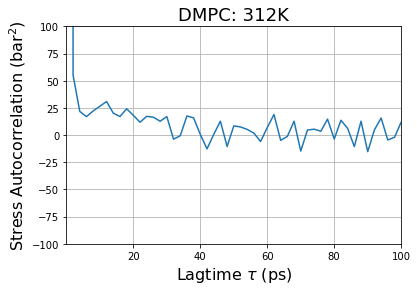

In [10]:
# plt.figure(figsize=(10,8))
plt.plot(pico['times'], mean_pico_12_acor, '-')

plt.ylim(-100,100)
# plt.xscale('log')
plt.grid(b=True)
plt.xlim(1e-3,1e2)

# plt.title('Off-Diagonal Stress Autocorrelation \n$\left\langle P_{xy}(t+\\tau)P_{xy}(t) \\right\\rangle_t$', size=20)
plt.title('DMPC: 312K', size=18)
plt.ylabel('Stress Autocorrelation (bar$^2$)', size=16)
plt.xlabel('Lagtime $\\tau$ (ps)', size=16)

plt.show()

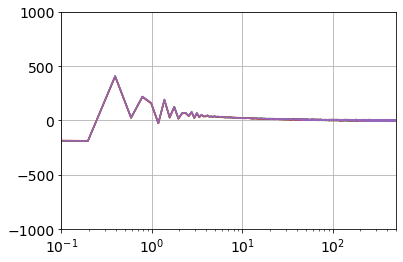

In [44]:
# plt.figure(figsize=(10,8))
for r in range(1,6):
    plt.plot(femto['times'], femto[f'12nm-r{r}-acor'], '-')
plt.xscale('log')
plt.ylim(-1000,1000)
plt.xlim(0.1,500)

plt.show()

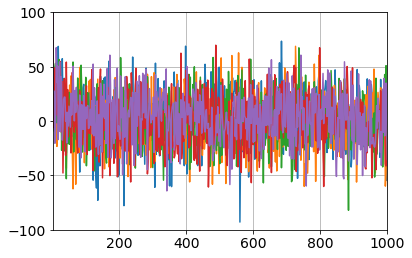

In [35]:
# plt.figure(figsize=(10,8))
for r in range(1,6):
    plt.plot(pico['times'], pico[f'12nm-r{r}-acor'], '-')
# plt.xscale('log')
plt.ylim(-100,100)
plt.xlim(1,1000)

plt.show()

In [31]:
print(np.array(pico['times'])[1], np.array(femto['times'])[1])

2.0 0.196


In [13]:
np.load(f'../dmpc-{w}nm/r{i}/femto_autocor.npz', allow_pickle=True)['arr_0']

array(['names', 'times', 'xy stress autocorrelation',
       'viscosity at each timestep (from 0)'], dtype='<U35')

In [14]:
for w in ['8','12','15']:
    femto[f'{w}nm-mean'] = np.mean((
        femto[f'{w}nm-r1-integ'],
        femto[f'{w}nm-r2-integ'],
        femto[f'{w}nm-r3-integ'],
        femto[f'{w}nm-r4-integ'],
        femto[f'{w}nm-r5-integ'],
    ), axis=0)
    femto[f'{w}nm-unc'] = sp.stats.sem((
        femto[f'{w}nm-r1-integ'],
        femto[f'{w}nm-r2-integ'],
        femto[f'{w}nm-r3-integ'],
        femto[f'{w}nm-r4-integ'],
        femto[f'{w}nm-r5-integ'],
    ), axis=0)

In [15]:
for w in ['8','12','15']:
    pico[f'{w}nm-mean'] = np.mean((
        pico[f'{w}nm-r1-integ'],
        pico[f'{w}nm-r2-integ'],
        pico[f'{w}nm-r3-integ'],
        pico[f'{w}nm-r4-integ'],
        pico[f'{w}nm-r5-integ'],
    ), axis=0)
    pico[f'{w}nm-unc'] = sp.stats.sem((
        pico[f'{w}nm-r1-integ'],
        pico[f'{w}nm-r2-integ'],
        pico[f'{w}nm-r3-integ'],
        pico[f'{w}nm-r4-integ'],
        pico[f'{w}nm-r5-integ'],
    ), axis=0)

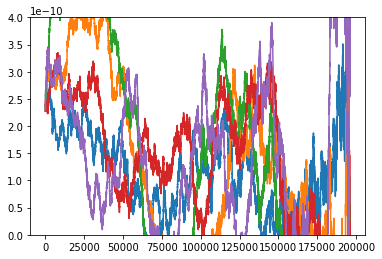

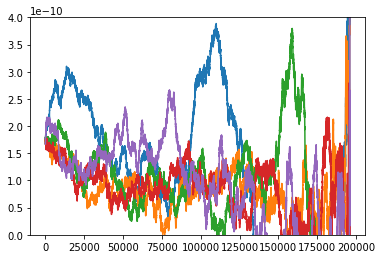

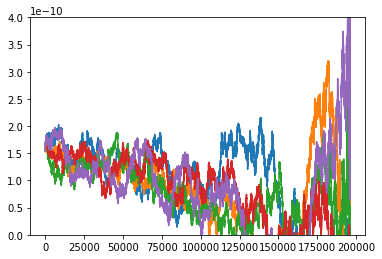

In [16]:
for w in ['8','12','15']:
    plt.plot(pico['times'], pico[f'{w}nm-r1-integ'])
    plt.plot(pico['times'], pico[f'{w}nm-r2-integ'])
    plt.plot(pico['times'], pico[f'{w}nm-r3-integ'])
    plt.plot(pico['times'], pico[f'{w}nm-r4-integ'])
    plt.plot(pico['times'], pico[f'{w}nm-r5-integ'])
    plt.ylim(0,4e-10)
    plt.show()

In [17]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.grid'] = True

In [18]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

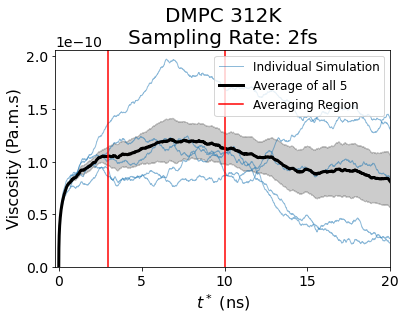

In [19]:
# plt.figure(figsize=(12,7))
plt.plot(femto['times']/1e3, femto[f'12nm-r1-integ']*13/3.78, 'C0', lw=1, alpha=0.5, label='Individual Simulation')
for r in range(2,6):
    plt.plot(femto['times']/1e3, femto[f'12nm-r{r}-integ']*13/3.78, 'C0', lw=1, alpha=0.5)


plt.plot(femto['times']/1e3, femto['12nm-mean']*13/3.78, 'k', lw=3, label='Average of all 5')
plt.fill_between(femto['times']/1e3, femto['12nm-mean']*13/3.78+femto['12nm-unc']*13/3.78,
                 femto['12nm-mean']*13/3.78-femto['12nm-unc']*13/3.78, alpha=0.2, color='k')
plt.ylim(0,6e-11*13/3.78)
plt.xlim(-0.2,2e4/1e3)
# plt.xscale('log')

plt.axvline(3, c='r', label='Averaging Region')
plt.axvline(10, c='r')

# plt.title('Integrated Autocorrelation. 5 Simulations Averaged.\n\
# $\int_0^{t^*} \left\langle P_{xy}(t+\\tau)P_{xy}(t) \\right\\rangle_\\tau d\\tau$', size=20)
plt.title('DMPC 312K\nSampling Rate: 2fs', fontsize=20)
plt.ylabel('Viscosity (Pa.m.s)', fontsize=16)
plt.legend(fontsize=12, loc=1)
plt.xlabel('$t^*$ (ns)', fontsize=16)


plt.grid(False)
plt.show()

In [20]:
femto["times"]

0               0.000
1               0.196
2               0.392
3               0.588
4               0.784
              ...    
999996     195999.216
999997     195999.412
999998     195999.608
999999     195999.804
1000000    196000.000
Name: times, Length: 1000001, dtype: float64

(0.0, 4e-10)

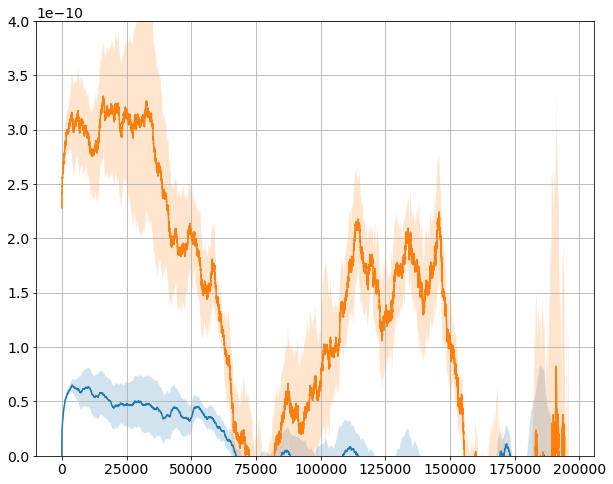

In [21]:
plt.figure(figsize=(10,8))

plt.plot(femto['times'], femto['8nm-mean'])
plt.fill_between(femto['times'], femto['8nm-mean']+femto['8nm-unc'],
                 femto['8nm-mean']-femto['8nm-unc'], alpha=0.2)

plt.plot(pico['times'], pico['8nm-mean'])
plt.fill_between(pico['times'], pico['8nm-mean']+pico['8nm-unc'],
                 pico['8nm-mean']-pico['8nm-unc'], alpha=0.2)

plt.ylim(0,4e-10)
# plt.xlim(0,50000)

In [22]:
pico.times[1]*49, femto.times[1]*500

(98.0, 98.0)

In [23]:
femto['times'][::500].head()

0         0.0
500      98.0
1000    196.0
1500    294.0
2000    392.0
Name: times, dtype: float64

In [24]:
np.array(femto['times'][::500])[25]

2450.0

In [25]:
femto['8nm-mean'][:25*500:500].tail()
pico['8nm-mean'][25*49::49].head()

1225    2.984925e-10
1274    2.990861e-10
1323    3.007125e-10
1372    3.028776e-10
1421    3.046245e-10
Name: 8nm-mean, dtype: float64

In [26]:
femto['times'][500]

98.0

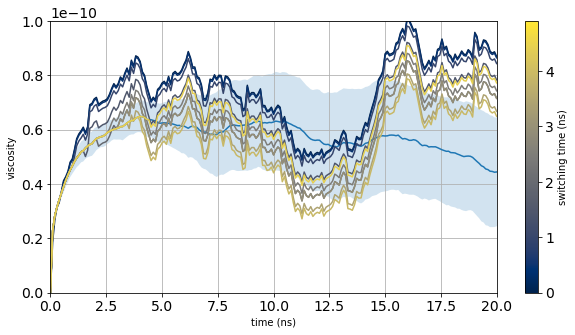

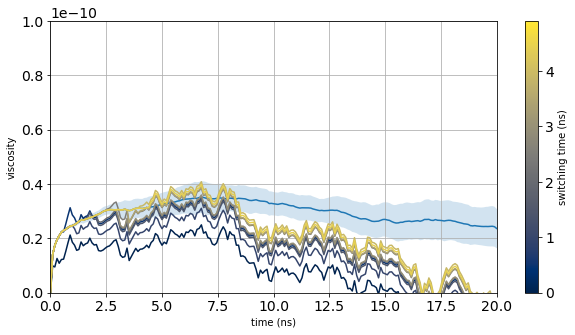

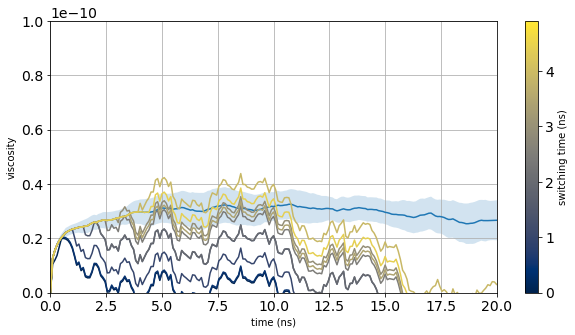

In [27]:
for w in ['8','12','15']:
    plt.figure(figsize=(10,5))
    plt.plot(femto['times'][::500]/1000, femto[f'{w}nm-mean'][::500])
    plt.fill_between(femto['times'][::500]/1000, femto[f'{w}nm-mean'][::500]+femto[f'{w}nm-unc'][::500],
                     femto[f'{w}nm-mean'][::500]-femto[f'{w}nm-unc'][::500], alpha=0.2)
    for c in range(0,50,5):
        temp = np.append(
            np.array(femto[f'{w}nm-mean'][:c*500:500]),
            np.array(pico[f'{w}nm-mean'][c*49::49]-pico[f'{w}nm-mean'][c*49]+femto[f'{w}nm-mean'][c*500])
        )
        plt.plot(pico['times'][::49]/1000, temp, c = plt.cm.cividis(plt.Normalize(0,50)(c)))
        
#         plt.fill_between(pico['times'][::49], temp+pico[f'{w}nm-unc'], temp-pico[f'{w}nm-unc'])
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,98*50/1000), cmap = 'cividis'), label='switching time (ns)')
    plt.ylabel('viscosity')
    plt.xlabel('time (ns)')
    plt.xlim(0, 20)
    plt.ylim(0, 1e-10)
    plt.show()

In [28]:
# picovis['80']

In [29]:
autocor_f = femto.f.arr_2
visco_f = femto.f.arr_3

autocor_p = pico.f.arr_2
visco_p = pico.f.arr_3

AttributeError: 'DataFrame' object has no attribute 'f'

In [ ]:
unc_p8 = sp.stats.sem((picovis['80'],
                    picovis['81'],
                    picovis['82'],
                    picovis['83'],
                    picovis['84']),
                    axis=0)
mean_p8 = np.mean((picovis['80'],
                    picovis['81'],
                    picovis['82'],
                    picovis['83'],
                    picovis['84']),
                    axis=0)
unc_p12 = sp.stats.sem((picovis['120'],
                    picovis['121'],
                    picovis['122'],
                    picovis['123'],
                    picovis['124']),
                    axis=0)
mean_p12 = np.mean((picovis['120'],
                    picovis['121'],
                    picovis['122'],
                    picovis['123'],
                    picovis['124']),
                    axis=0)
unc_p15 = sp.stats.sem((picovis['150'],
                    picovis['151'],
                    picovis['152'],
                    picovis['153'],
                    picovis['154']),
                    axis=0)
mean_p15 = np.mean((picovis['150'],
                    picovis['151'],
                    picovis['152'],
                    picovis['153'],
                    picovis['154']),
                    axis=0)

In [ ]:
unc_f8 = sp.stats.sem((femtovis['80'],
                    femtovis['81'],
                    femtovis['82'],
                    femtovis['83'],
                    femtovis['84']),
                    axis=0)
mean_f8 = np.mean((femtovis['80'],
                    femtovis['81'],
                    femtovis['82'],
                    femtovis['83'],
                    femtovis['84']),
                    axis=0)
unc_f12 = sp.stats.sem((femtovis['120'],
                    femtovis['121'],
                    femtovis['122'],
                    femtovis['123'],
                    femtovis['124']),
                    axis=0)
mean_f12 = np.mean((femtovis['120'],
                    femtovis['121'],
                    femtovis['122'],
                    femtovis['123'],
                    femtovis['124']),
                    axis=0)
unc_f15 = sp.stats.sem((femtovis['150'],
                    femtovis['151'],
                    femtovis['152'],
                    femtovis['153'],
                    femtovis['154']),
                    axis=0)
mean_f15 = np.mean((femtovis['150'],
                    femtovis['151'],
                    femtovis['152'],
                    femtovis['153'],
                    femtovis['154']),
                    axis=0)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(picotimes, mean_p8-mean_p8[0], c='C0')
plt.plot(picotimes, mean_p12-mean_p12[0], c='C1')
plt.plot(picotimes, mean_p15-mean_p15[0], c='C2')

plt.plot(femtotimes, mean_f8-mean_f8[0], c='C0')
plt.plot(femtotimes, mean_f12-mean_f12[0], c='C1')
plt.plot(femtotimes, mean_f15-mean_f15[0], c='C2')

# plt.ylim(0,4e-10)

plt.yscale('log')
plt.ylim(1e-13,1e-9)

plt.xlim(-10,100)

# plt.axvline(x=33000, c='r')

In [ ]:
print(picotimes[1],femtotimes[1])
print(2/0.196)
print(femtotimes[::500][-1])
print(picotimes[::49][-1])

In [ ]:
plt.plot(picotimes[::49], mean_p8[::49]  - mean_f8[::500])
plt.plot(picotimes[::49], mean_p12[::49] - mean_f12[::500])
plt.plot(picotimes[::49], mean_p15[::49] - mean_f15[::500])
plt.ylim(0,3e-10)
plt.xlim(0,50000)
# plt.xscale('log')
plt.axvline(x=33000, c='r')

In [ ]:
for i in range(5):
    plt.plot(picotimes, picovis[str(8)+str(i)],'k', alpha = 0.2)
plt.plot(picotimes, mean8, color='r')
plt.fill_between(picotimes, mean8+unc8, mean8-unc8, color='r', alpha=0.2)
# plt.xscale('log')
plt.xlim(0,100000)
plt.ylim(top=1e-9, bottom=0)

In [ ]:
for v in [[visco8, unc8], [visco12, unc12], [visco15, unc15]]:
    plt.plot(femto.f.arr_1, np.mean(v[0], axis=1))
    plt.fill_between(femto.f.arr_1, np.mean(v[0], axis=1)+v[1], np.mean(v[0], axis=1)-v[1], alpha=0.2)
    # plt.xscale('log')
plt.xlim(0,40000)
plt.ylim(top=0.8e-10, bottom=0)

In [ ]:
np.min((100,10000))

In [ ]:
ratio = (
    (np.cumsum(autocor2000)*2)-(np.cumsum(autocor2)[::1000]*0.002)
)

In [ ]:
ratio[9000]

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(np.arange(len(autocor2))[::10000]*0.002, np.cumsum(autocor2)[::10000]*0.002,'k-',label='2fs sampling')
plt.plot(np.arange(len(autocor2000))*2, np.cumsum(autocor2000)*2, 'k-', label='2ps sampling')

plt.plot(np.arange(len(autocor2000))*2, ratio, 'r-', label='difference')

plt.axvline(x=0, c='g')
plt.axvline(x=20000, c='g')


plt.legend()
plt.show()
# plt.xlim(-100,50000)
# plt.xscale('log')

In [ ]:
for n in range(14):
    plt.figure(figsize=(12,6))
    plt.grid(True)
    plt.plot(np.arange(len(autocor2))[::1000]*0.002, np.cumsum(autocor2)[::1000]*0.002,'b--',label='2fs sampling',)
    plt.plot(np.arange(2**n, len(autocor2000))*2, 
             np.sum(autocor2[:2**n*1000])*0.002 + np.cumsum(autocor2000[2**n:])*2, 
             'r-', label='fixed 2ps sampling',
            alpha=0.5)
    plt.axvline(x=2**n*2, c='r')
    # plt.xlim(np.array([-0.1,1])*1000)
    plt.xlim(1,25000)
    plt.xscale('log')
    plt.title(f'switching at t={2**n*2} ps')
    plt.ylim(300,10000)
    plt.yscale('log')
    plt.legend(fontsize=20)
    plt.show()